In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.callbacks import EarlyStopping

2023-12-08 21:23:17.006327: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
data_dir = "ChestXR"

disease_names = [
    "Abscess", "Ards", "Atelectasis", "Atherosclerosis of the aorta", "Cardiomegaly",
    "Emphysema", "Fracture", "Hydropneumothorax", "Hydrothorax", "Pneumonia",
    "Pneumosclerosis", "Post inflammatory changes", "Post traumatic ribs deformation",
    "Sarcoidosis", "Scoliosis", "Tuberculosis", "Venous congestion"
]


In [3]:
img_width, img_height = 150, 150

num_classes = len(disease_names)

batch_size = 16

train_datagen = ImageDataGenerator(rescale=1./255,validation_split=0.2)
train_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical'
)

validation_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation')


Found 97 images belonging to 17 classes.
Found 13 images belonging to 17 classes.


In [4]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(img_width, img_height, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

In [5]:
epochs = []
loses = []
accuracies = []

steps_per_epoch = max(1, train_generator.samples // batch_size)
validation_steps = max(1, validation_generator.samples // batch_size)

early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1, restore_best_weights=True)

# for epoch in range(30):
#     model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

#     model.fit(
#         train_generator,
#         steps_per_epoch=train_generator.samples // batch_size,

#     )

#     epochs.append(epoch)
#     loses.append(model.history.history['loss'][-1])
#     accuracies.append(model.history.history['accuracy'][-1])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
epochs = 50
history = model.fit(
    train_generator,
    steps_per_epoch=steps_per_epoch,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=validation_steps,
    callbacks=[early_stopping])

Epoch 1/50
6/6 [==============================] - 11s 2s/step - loss: 2.8675 - accuracy: 0.0617 - val_loss: 2.7884 - val_accuracy: 0.0769
Epoch 2/50
6/6 [==============================] - 9s 1s/step - loss: 2.7877 - accuracy: 0.1111 - val_loss: 2.5910 - val_accuracy: 0.2308
Epoch 3/50
6/6 [==============================] - 9s 1s/step - loss: 2.6509 - accuracy: 0.2099 - val_loss: 2.3732 - val_accuracy: 0.1538
Epoch 4/50
6/6 [==============================] - 9s 1s/step - loss: 2.3045 - accuracy: 0.2469 - val_loss: 1.8019 - val_accuracy: 0.4615
Epoch 5/50
6/6 [==============================] - 10s 2s/step - loss: 1.9314 - accuracy: 0.3854 - val_loss: 1.4703 - val_accuracy: 0.5385
Epoch 6/50
6/6 [==============================] - 9s 1s/step - loss: 1.7061 - accuracy: 0.5062 - val_loss: 1.3611 - val_accuracy: 0.6154
Epoch 7/50
6/6 [==============================] - 9s 1s/step - loss: 1.5048 - accuracy: 0.5062 - val_loss: 1.4080 - val_accuracy: 0.5385
Epoch 8/50
6/6 [=======================

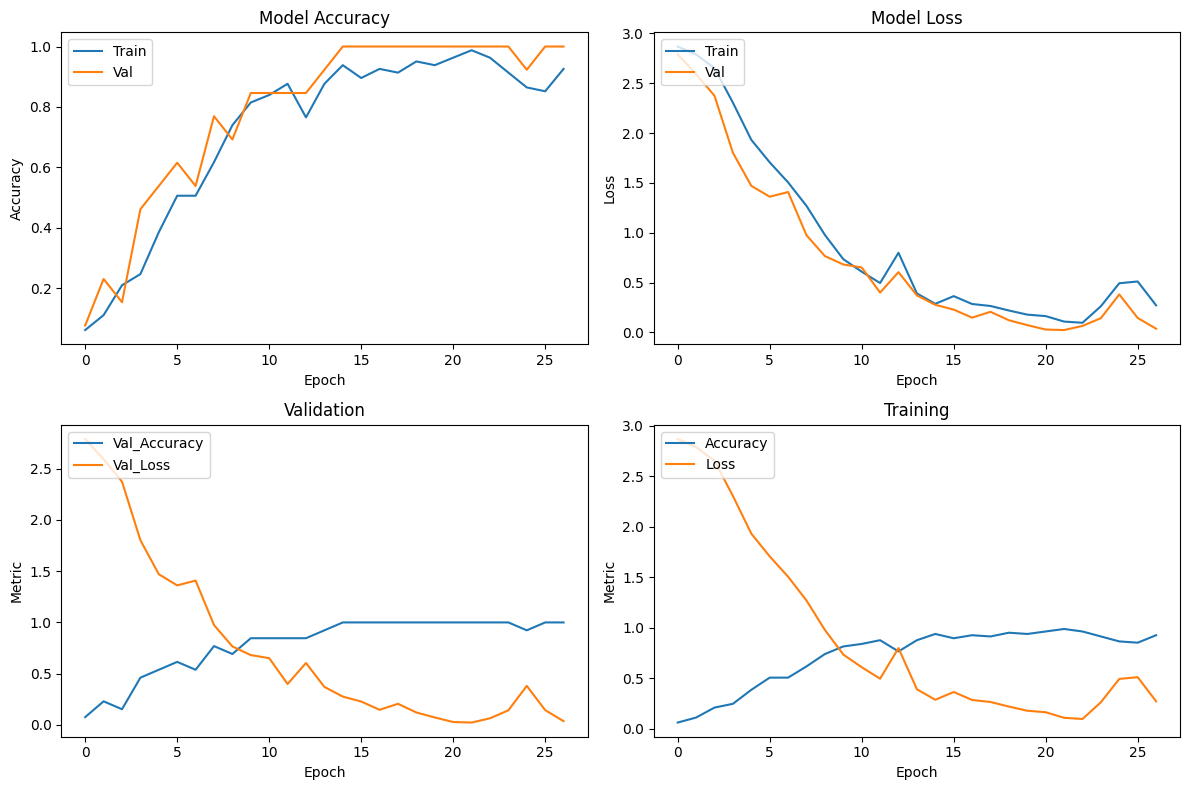

In [6]:
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

axs[0, 0].plot(history.history['accuracy'])
axs[0, 0].plot(history.history['val_accuracy'])
axs[0, 0].set_title('Model Accuracy')
axs[0, 0].set_ylabel('Accuracy')
axs[0, 0].set_xlabel('Epoch')
axs[0, 0].legend(['Train', 'Val'], loc='upper left')

axs[0, 1].plot(history.history['loss'])
axs[0, 1].plot(history.history['val_loss'])
axs[0, 1].set_title('Model Loss')
axs[0, 1].set_ylabel('Loss')
axs[0, 1].set_xlabel('Epoch')
axs[0, 1].legend(['Train', 'Val'], loc='upper left')

axs[1, 0].plot(history.history['val_accuracy'])
axs[1, 0].plot(history.history['val_loss'])
axs[1, 0].set_title('Validation')
axs[1, 0].set_ylabel('Metric')
axs[1, 0].set_xlabel('Epoch')
axs[1, 0].legend(['Val_Accuracy', 'Val_Loss'], loc='upper left')

axs[1, 1].plot(history.history['accuracy'])
axs[1, 1].plot(history.history['loss'])
axs[1, 1].set_title('Training')
axs[1, 1].set_ylabel('Metric')
axs[1, 1].set_xlabel('Epoch')
axs[1, 1].legend(['Accuracy', 'Loss'], loc='upper left')

plt.tight_layout()
plt.show()

In [7]:
model.save("xray_disease_detection_model.h5")

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
